![data-x](http://oi64.tinypic.com/o858n4.jpg)


## Data-X (IEOR 290): HW 1

### Uvika Chaturvedi

#### SID: 3032162420
___

# Part 1 "Real time" data stream of stock prices

In part 1 you are going to design your own "real time" (batch) stock price prediction and visualization application.



# Q1:

First we have a pre-written program for you (that you are welcome to modify - but it works as is). It fetches "real time" stock data from Google. The program is given to you as it covers some topics that we have not touched upon in class - like user defined input, defensive programming, opening a connection to a url, parsing json data to a dictionary, and writing to a CSV file.

Your task is to run the program below and collect 100 data samples of stock prices for three user defined stocks. There should be an approximate time delay of ten seconds between the updates.

**Note:** The data collection has to be done on a weekday between 9.30am - 4pm (Eastern time), in order for the stock prices to be volatile  - as this is the open trade window for NASDAQ. If you want to start Q2-Q5 before you have collected data, you can access a preliminary CSV file here: https://www.dropbox.com/s/bbf5v325byt3qr6/stock_data_example.csv?dl=1

In [ ]:
## Load packages
import urllib2
import datetime as dt
import time
import json
import os.path
import sys

# NASDAQ STOCKS BASE URL
base_url = 'http://finance.google.com/finance/info?client=ig&q=NASDAQ:' 
# Stock examples: AAPL, TSLA, GOOGL


# Define number of stocks, total updates, and time between updates
def assign(string):
    ## Example of defensive programming, input must be positive integer
    
    while True:
        try:
            var = int(raw_input(string+': ')) # convert string input to integer
        except:
            print string + ' must be positive integer, try again'
            continue
        if var < 1:
            print string + ' must be a positive integer, try again'
            continue
        break
        
    return var


nbr_of_stocks = assign("Number of stocks")
nbr_of_updates = assign("Number of total stock updates")
update_time = assign("Approximate time delay (seconds) between updates")


# Define stock names (as stock ticker / stock symbol), store in dictionary
stocks = dict()
for i in range(nbr_of_stocks):
    stock_key = 'stock'+str(i)
    
    # User input, define stock with a certain stock symbol e.g. GOOGL, TSLA, AAPL
    stocks[stock_key] = raw_input("Stock"+str(i+1)+" Code: ") 


def get_stock_value(stock):
    '''
    Fetch stock value for stock ticker / stock symbol
    '''
    
    url = base_url + stock # url to stock
    
    # Defensive programming. Raise error if stock symbol does not exist
    try:
        url_socket = urllib2.urlopen(url)
    except:
        print 'WRONG STOCK CODE "' + stock + '"'
        sys.exit()
    
    data = url_socket.read() # read in the URL data as a string
    
    start_idx = data.find('{') # starting index of json part of the string
    end_idx = data.find('}') # ending index of json part of the string
    
    info = json.loads(data[start_idx:end_idx+1]) #load json data to a dictionary
    stock_price = info['l'] # stock prices are stored under key 'l'
    
    return stock_price


# Create / Overwrite CSV file and add header
f = open('stock_data.csv','wb')
header = 'Time Stamp,'+','.join(stocks.values())

f.write(header+'\n') # write header to CSV file stock_data.csv, add new line


def current_time_str():
    '''
    Get current time as a string: Format "Year-Month-Date Hour:Minute:Second"
    '''
    t = dt.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    return t


print '\n\n\nSTOCK PRICES (USD):\n' # Print output, to see that script is running


i=0
while nbr_of_updates > i:
    '''
    Fetch stock info with given time interval and write to CSV
    Store the values in a list
    '''
    
    # store stock values in a list
    vals = list()
    for stock in stocks.values():
        val = get_stock_value(stock)
        vals.append(val)
        
        print stock, ':', val

        
    t = current_time_str() # current date and time as string
    print 'Fetched at', t,'\n'
    
    
    # write time and stock values as a CSV on a seperate line
    f.write(t+','+','.join(vals)+'\n') 
    i+=1 # iterate
    time.sleep(update_time) # time (in seconds) before the loop runs again


f.close() # close file connection

print '\nDone!'

#### Part 1 (continued)
# Q2: Simple stock statistics

* 1: Read in the data stored in stock_data.csv to a DataFrame called **df**.


* 2: Convert the 'Time Stamp' column to datetime objects, specifying the year, month, date, hour, minute, second in the format:

    `%Y-%m-%d %H:%M:%S`
    
    Store the datetime objects as the index of **df** (hint: Lookup pandas DatetimeIndex) . Then, drop the 'Time Stamp' column.


* 3: Calculate the OLHC for each stock (Open, Low, High, Close values). Note: Let Open time be the first time stamp in your data set and Closing time the last time stamp in your data set.


* 4: Calculate the mean stock price for each stock, and it's standard deviation.


* 5: Calculate the total change in price over the time period (Closing Value - Open Value)


* 6: Create a variable called **t**, that is an array with every time stamp in seconds after the first stock data was collected. I.e.,

    `t[0] = 0,.., t[99] = 10*100 + running time`. 

In [69]:
import pandas as pd
## Input answers here ##
# Read in the data stored in stock_data.csv to a DataFrame called df.
df = pd.read_csv('stock_data.csv')

# Convert the 'Time Stamp' column to datetime objects, specifying the year, month, date, hour, minute, second in the format:
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'], format = '%Y-%m-%d %H:%M:%S')
df.set_index('Time Stamp', inplace = True)

# Calculate the OLHC for each stock (Open, Low, High, Close values). Note: Let Open time be the first time stamp in your data set and Closing time the last time stamp in your data set.
open_time = df.ix[0]
print "open time:\n", open_time
close_time = df.ix[len(df)-1]
print "close time:\n", close_time
high  = df.max()
print "high:\n",high
low = df.min()
print "low:\n",low

open time:
AAPL     135.37
GOOGL    840.63
TSLA     273.00
Name: 2017-02-16 09:36:31, dtype: float64
close time:
AAPL     135.33
GOOGL    840.47
TSLA     272.87
Name: 2017-02-16 09:55:41, dtype: float64
high:
AAPL     135.46
GOOGL    840.95
TSLA     273.50
dtype: float64
low:
AAPL     135.33
GOOGL    840.39
TSLA     272.48
dtype: float64


,AAPL,GOOGL,TSLA
Time Stamp,,,
2017-02-16 09:36:31,135.37,840.63,273.00
2017-02-16 09:36:42,135.38,840.63,273.04
2017-02-16 09:36:54,135.39,840.63,273.07
2017-02-16 09:37:04,135.37,840.63,273.22
2017-02-16 09:37:15,135.37,840.63,273.20


In [2]:
#mean of the different columns
mean = df.mean()
print "mean: \n", mean

#stdev of the different columns
stdev = df.std()
print "standard deviation: \n", stdev

mean: 
AAPL     135.4041
GOOGL    840.6624
TSLA     272.9946
dtype: float64
standard deviation: 
AAPL     0.029579
GOOGL    0.164986
TSLA     0.280873
dtype: float64


In [3]:
#total change in price
change = close_time - open_time
print "Change:\n", change

Change:
AAPL    -0.04
GOOGL   -0.16
TSLA    -0.13
dtype: float64


In [4]:
import numpy as np
from datetime import timedelta
#variable t
sec = df.index
delta = sec - sec[0]
t = delta.total_seconds()
t

array([    0.,    11.,    23.,    33.,    44.,    56.,    67.,    80.,
          90.,   101.,   112.,   123.,   133.,   145.,   157.,   169.,
         184.,   195.,   207.,   219.,   231.,   242.,   252.,   264.,
         275.,   286.,   298.,   309.,   320.,   331.,   343.,   354.,
         365.,   375.,   387.,   398.,   408.,   415.,   427.,   438.,
         448.,   460.,   470.,   481.,   492.,   507.,   517.,   528.,
         540.,   552.,   563.,   575.,   587.,   598.,   610.,   621.,
         633.,   645.,   657.,   669.,   681.,   693.,   704.,   715.,
         727.,   739.,   750.,   762.,   773.,   786.,   797.,   810.,
         823.,   834.,   845.,   856.,   869.,   879.,   897.,   911.,
         923.,   934.,   945.,   958.,   969.,   981.,   992.,  1004.,
        1017.,  1030.,  1042.,  1055.,  1066.,  1078.,  1089.,  1101.,
        1113.,  1127.,  1138.,  1150.])

# Q3: Plotting

* Create a graph over the stock prices with matplotlib. It should have three subplots, each showing one stock's price change over the time period. The y-axis should show the stock price and the x axis should be the **t** variable from Q1.5, i.e. the number of seconds after the first stock price was fetched (t[0] = 0).  

Try to make a similar plot as the one below (**Note:** Your solution does not have to look exatly the same)

<img style="width: 500px" src="https://www.dropbox.com/s/8036uyug8lq17fk/hw4_plot1.png?dl=1">

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


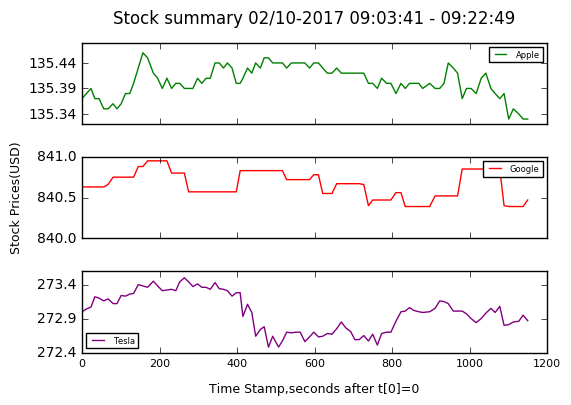

In [5]:
import matplotlib.pyplot as plt

## Input answer here ##
fig, ax = plt.subplots(nrows=3)
fig.subplots_adjust(hspace= 0.4)


ax[0].plot(t, df['AAPL'], color = 'green')
ax[0].yaxis.set_ticks(np.arange(135.34,135.45,0.05))
ax[0].ticklabel_format(useOffset=False)
plt.setp(ax[0].get_xticklabels(), visible = False)
plt.setp(ax[0].get_xticklabels(), fontsize =8)
ax[0].legend(loc = 1, labels = ['Apple'], fontsize = 6)

ax[1].plot(t,df['GOOGL'], color = 'red')
ax[1].yaxis.set_ticks(np.arange(840,841.5,0.5))
plt.setp(ax[1].get_xticklabels(), visible = False)
ax[1].legend(loc = 1, labels = ['Google'], fontsize = 6)
plt.setp(ax[1].get_xticklabels(), fontsize =8)

ax[2].plot(t,df['TSLA'], color = 'purple')
ax[2].yaxis.set_ticks(np.arange(272.4,273.6,0.5))
ax[2].ticklabel_format(useOffset=False)
plt.setp(ax[2].get_xticklabels(), fontsize =8)
ax[2].legend(loc = 3, labels = ['Tesla'], fontsize = 6)


plt.xlabel('Time Stamp,seconds after t[0]=0', fontsize = 9, labelpad =10)
ax[1].set_ylabel('Stock Prices(USD)', fontsize = 9, labelpad = 10)
ax[0].set_title('Stock summary 02/10-2017 09:03:41 - 09:22:49', fontsize = 12, y = 1.15)


plt.show()

# Q4: Prediction

* 1: Fit three Linear Regression models, each model should use all the data collected for one stock, i.e., fit one model for each of the stocks. 


* 2: Use the models from Q4.1 to predict what the stock price would be for each stock ten minutes after the Closing time.


* 3: Calculate the Mean Squared Error (MSE) for your stock price prediction models, i.e. calculate 3 MSEs, one for every stock prediction model.


* 4: Form three new Regression models, using only the 30 first data samples collected, i.e. dependent variables **stock_price[:30]** and predictors **t[:30]**. Use these models to predict the stock price for the three stocks at the time stamp **t[59]**, then compare your predictions to the collected stock value at that time (i.e., **stock_price[59]**).



# Q5: Plot stock prices together with your 30 data point predictions

* Plot the three stock prices as in Q3, and then plot the Linear Regression predictions that predicted stock prices from your 30 first collected samples. Plot the stock prices and the Linear Predictions in the same figure for the same time period, i.e. **t**. Also add a vertical line to your three plots where **t = t[29]** (i.e. at and before this line are all the data points used to form your 30 data point regression models). 

    Try to make a similar plot as the one below (**Note:** Your solution does not have to look exatly the same)
    
<img style="width: 500px" src="https://www.dropbox.com/s/utj4xozvtdt7xjo/hw4_plot2.png?dl=1">

In [6]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

## Input answer here ##
#4.1
x = t.reshape(-1,1) 
model1 = linear_model.LinearRegression()
model2 = linear_model.LinearRegression()
model3 = linear_model.LinearRegression()
model1.fit(x, df['AAPL'])
model2.fit(x,df['GOOGL'])
model3.fit(x,df['TSLA'])

#4.2
x_predict = t+600
x_predict = x_predict.reshape(-1,1)
f1 = model1.predict(x_predict).flatten()
f2 = model2.predict(x_predict).flatten()
f3 = model3.predict(x_predict).flatten()

#4.3
p1 = model1.predict(x).flatten()
p2 = model2.predict(x).flatten()
p3 = model3.predict(x).flatten()
e1 = mean_squared_error(df['AAPL'], p1)
e2 = mean_squared_error(df['GOOGL'],p2)
e3 = mean_squared_error(df['TSLA'],p3)

e1,e2,e3

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


(0.00085069640978490692, 0.022802251090378568, 0.059534441668859218)

In [58]:
#4.4
x = t[:30].reshape(-1,1) 
model1 = linear_model.LinearRegression()
model2 = linear_model.LinearRegression()
model3 = linear_model.LinearRegression()
model1.fit(x, df['AAPL'][:30])
model2.fit(x,df['GOOGL'][:30])
model3.fit(x,df['TSLA'][:30])

f1 = model1.predict(t[59]).flatten()
f2 = model2.predict(t[59]).flatten()
f3 = model3.predict(t[59]).flatten()

accuracy1 =  100 - abs(df['AAPL'][59] - f1)*100/df['AAPL'][59]
accuracy2 = 100 - abs(df['GOOGL'][59] - f2)*100/df['GOOGL'][59]
accuracy3 = 100 - abs(df['TSLA'][59] - f3)*100/df['TSLA'][59]

accuracy1,accuracy2,accuracy3

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


(array([ 99.97105734]), array([ 99.99197355]), array([ 99.64796993]))

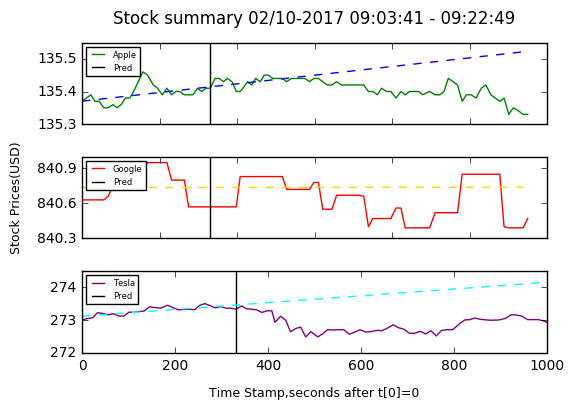

In [67]:
## Input answer here ##
fig, ax = plt.subplots(nrows = 3)
fig.subplots_adjust(hspace= 0.4)

t = t.reshape(-1,1)
f1 = model1.predict(t).flatten()
f2 = model2.predict(t).flatten()
f3 = model3.predict(t).flatten()


ax[0].plot(t,df['AAPL'], color = 'green')
ax[0].axvline(t[29], color = 'black')
ax[0].plot(t,f1, color = 'blue',linestyle = '--')
ax[0].ticklabel_format(useOffset = False)
ax[0].yaxis.set_ticks(np.arange(135.3,135.6,0.1))
plt.setp(ax[0].get_xticklabels(),visible = False)
ax[0].legend(loc = 2, labels = ['Apple', 'Pred'], fontsize = 6)

ax[1].plot(t,df['GOOGL'], color = 'red')
ax[1].axvline(t[29], color = 'black')
ax[1].plot(t,f2, color = 'gold',linestyle = '--')
ax[1].yaxis.set_ticks(np.arange(840.3,840.9,.3))
ax[1].ticklabel_format(useOffset = False)
plt.setp(ax[1].get_xticklabels(),visible = False)
ax[1].legend(loc = 2, labels = ['Google','Pred'], fontsize = 6)

ax[2].plot(t,df['TSLA'], color = 'purple')
ax[2].axvline(t[29], color= 'black')
ax[2].plot(t,f3, color = 'cyan',linestyle = '--')
ax[2].yaxis.set_ticks(np.arange(272,275,1))
ax[2].ticklabel_format(useOffset = False)
ax[2].legend(loc = 2, labels = ['Tesla','Pred'], fontsize = 6)

plt.xlabel('Time Stamp,seconds after t[0]=0', fontsize = 9, labelpad =10)
ax[1].set_ylabel('Stock Prices(USD)', fontsize = 9, labelpad = 10)
ax[0].set_title('Stock summary 02/10-2017 09:03:41 - 09:22:49', fontsize = 12, y = 1.15)
plt.xlim(0, 1000)
plt.show()

# Extra credit

Mathematically derive the optimal weights that minimizes the least square error, **$\epsilon^2$**. I.e. prove that $\hat{\beta} = (X^TX)^{-1}X^TY $ (matrix notation) are the optimal weight estimates for the ordinary least squares (OLS) model, given that $(X^TX)^{-1}$ exists.

$$Y = \hat{\beta} X + \epsilon \text{    see matrix notation below:}$$

.

$$\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{M}
\end{bmatrix}
=
\begin{bmatrix}
1 & x_{11} & \cdots & x_{1N} \\
1 & x_{21} & \cdots & x_{2N} \\
\vdots & \ddots & \ddots & \vdots \\
1 & x_{M1} & \cdots & x_{MN}
\end{bmatrix}
*
\begin{bmatrix}
\hat{\beta}_{0} \\
\hat{\beta}_{1} \\
\vdots \\
\hat{\beta}_{N}
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_{1} \\
\epsilon_{2} \\
\vdots \\
\epsilon_{M}
\end{bmatrix} $$

.

<center>The objective is to minimize: $\epsilon^T\epsilon$:</center>


$$\epsilon^T\epsilon = \begin{bmatrix}
\epsilon_{1} & \epsilon_{2} & \cdots & \epsilon_{M} \\
\end{bmatrix}
\begin{bmatrix}
\epsilon_{1} \\
\epsilon_{2} \\
\vdots \\
\epsilon_{M}
\end{bmatrix} = \sum_{i=1}^{M}\epsilon_{i}^{2}
$$


<center> where, </center>

$$\epsilon = Y-\hat{\beta} X$$



In [ ]:
'''
## PLEASE SUBMIT YOUR ANSWER to the EXTRA CREDIT question as 
## a written mathematical proof.
## Either turn it in as a PDF to bcourses (scanned / photo copy) 
## named "[student name]-hw4-ec.pdf"
## or turn it in on paper 
## at the beginning of Lecture 5 with your name and SID
'''